In [67]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler


np.random.seed(42)

df = pd.read_csv('/Users/esten/Downloads/Auto.csv')
print(f'Loaded {len(df)} samples')

predictors = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
target = 'mpg'
df = df[predictors + [target]]
df = df.replace('?', None)
df = df.astype(float)

df = df.sample(frac=1.)
train = df.iloc[:int(len(df) * 0.8)].copy()
validation = df.iloc[int(len(df) * 0.8):].copy()
print(f'Using {len(train)} samples for training')
print(f'Using {len(validation)} samples for validation')

for column in predictors:
    mean_value = np.nanmean(train[column].astype(float).values)
    train.loc[np.isnan(train[column]), column] = mean_value
    validation.loc[np.isnan(validation[column]), column] = mean_value
    train[column] = (train[column] - np.mean(train[column])) / np.std(train[column])
    validation[column] = (validation[column] - np.mean(validation[column])) / np.std(validation[column])

Loaded 397 samples
Using 317 samples for training
Using 80 samples for validation


Validation MSE: 11.697378437323911


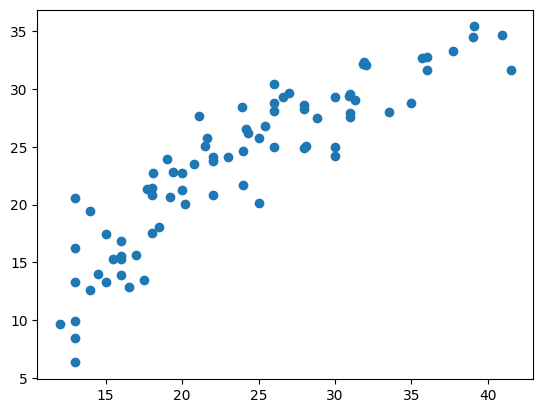

In [68]:
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse


model = Ridge(alpha=1)
model.fit(train[predictors], train[target])

predictions = model.predict(validation[predictors])
validation_mse = mse(validation[target].values, predictions)

print(f'Validation MSE: {validation_mse}')

plt.scatter(validation[target], predictions)
plt.show()

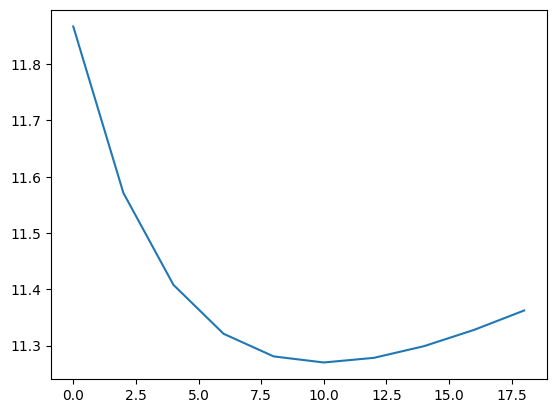

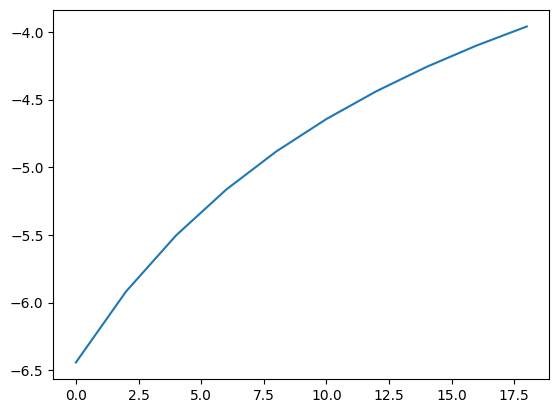

In [72]:
plt.ticklabel_format(style='plain')

mses = []
coefs = []

alphas = np.arange(0, 20, 2)

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(train[predictors].values, train[target])
    
    predictions = model.predict(validation[predictors].values)
    validation_mse = mse(validation[target].values, predictions)
    
    mses.append(validation_mse)
    coefs.append(model.coef_[3])
    
plt.plot(alphas, mses)
plt.show()

plt.plot(alphas, coefs)

114   -0.836434
278   -1.155882
237   -1.085023
57    -0.821333
72     1.053534
         ...   
321   -0.836434
216   -1.091993
279   -0.987446
376   -1.179115
236   -0.267237
Name: weight, Length: 317, dtype: float64